In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['Arial']
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [2]:
dataset = pd.read_csv('D://Research/radicals/UKESM1-0-LL_2010_2014(ver240110).csv')

In [3]:
land = pd.read_csv('C://Users/Haitong/OneDrive - National University of Singapore/Documents/Manuscripts/Sun-NG-25/global_grid_2x2_label_continent.csv')
dataset_land = dataset.merge(land, how='left', left_on=['longitude','latitude'], right_on=['longitude','latitude'])
dataset_land = dataset_land[dataset_land['land_global']==1]

In [4]:
list(dataset_land)

['longitude',
 'latitude',
 't',
 'loc_x',
 'o3',
 'o3prod',
 'o3loss',
 'eminox',
 'emivoc',
 'tas',
 'hus',
 'aod',
 'bldep',
 'ua',
 'va',
 'ps',
 'jno2',
 'photo1d',
 'lossch4',
 'lossco',
 'no2',
 'no',
 'oh',
 'h2o',
 'pan',
 'hno3',
 'co',
 'hcho',
 'ch4',
 'ch3o2_mod',
 'ho2_mod',
 'o1d_mod',
 'o3_mole',
 'no2_mole',
 'no_mole',
 'h2o_mole',
 'co_mole',
 'hcho_mole',
 'oh_mole',
 'n2_mole',
 'o2_mole',
 'lossco_mole',
 'lossch4_mole',
 'o1d_mole',
 'ho2_mole',
 'ch3o2_mole',
 'ch3ooh_mole',
 'o1d_mod_vmr',
 'ho2_mod_vmr',
 'ch3o2_mod_vmr',
 'o1d_vmr',
 'ho2_vmr',
 'ch3o2_vmr',
 'o1d_mod_mole',
 'ho2_mod_mole',
 'ch3o2_mod_mole',
 'o1d_mole_adj',
 'ho2_mole_adj',
 'ch3o2_mole_adj',
 'k1',
 'k2',
 'k3',
 'k4',
 'k5',
 'k6',
 'k7',
 'k8',
 'k9',
 'k9a',
 'k9b',
 'k10',
 'k11',
 'k12',
 'k13',
 'k14',
 'k15',
 'k15a',
 'k15b',
 'k16',
 'pt1',
 'pt2',
 'pt4',
 'pt5',
 'pt6',
 'o3prod_mole',
 'o3loss_mole',
 'pt3',
 'pt7',
 'pt3_adj',
 'pt7_adj',
 'o3prod_mole_adj',
 'o3loss_mole_adj

In [5]:
dataset_land['o3net_mole'] = dataset_land['o3prod_mole'] - dataset_land['o3loss_mole']

In [6]:
dataset_land['o3net_mole'].median()

1114606.668596

In [10]:
list(dataset_land)

['longitude',
 'latitude',
 't',
 'loc_x',
 'o3',
 'o3prod',
 'o3loss',
 'eminox',
 'emivoc',
 'tas',
 'hus',
 'aod',
 'bldep',
 'ua',
 'va',
 'ps',
 'jno2',
 'photo1d',
 'lossch4',
 'lossco',
 'no2',
 'no',
 'oh',
 'h2o',
 'pan',
 'hno3',
 'co',
 'hcho',
 'ch4',
 'ch3o2_mod',
 'ho2_mod',
 'o1d_mod',
 'o3_mole',
 'no2_mole',
 'no_mole',
 'h2o_mole',
 'co_mole',
 'hcho_mole',
 'oh_mole',
 'n2_mole',
 'o2_mole',
 'lossco_mole',
 'lossch4_mole',
 'o1d_mole',
 'ho2_mole',
 'ch3o2_mole',
 'ch3ooh_mole',
 'o1d_mod_vmr',
 'ho2_mod_vmr',
 'ch3o2_mod_vmr',
 'o1d_vmr',
 'ho2_vmr',
 'ch3o2_vmr',
 'o1d_mod_mole',
 'ho2_mod_mole',
 'ch3o2_mod_mole',
 'o1d_mole_adj',
 'ho2_mole_adj',
 'ch3o2_mole_adj',
 'k1',
 'k2',
 'k3',
 'k4',
 'k5',
 'k6',
 'k7',
 'k8',
 'k9',
 'k9a',
 'k9b',
 'k10',
 'k11',
 'k12',
 'k13',
 'k14',
 'k15',
 'k15a',
 'k15b',
 'k16',
 'pt1',
 'pt2',
 'pt4',
 'pt5',
 'pt6',
 'o3prod_mole',
 'o3loss_mole',
 'pt3',
 'pt7',
 'pt3_adj',
 'pt7_adj',
 'o3prod_mole_adj',
 'o3loss_mole_adj

In [11]:
dataset_land_grid = dataset_land.groupby('loc_x').mean(numeric_only =True)[['eminox','emivoc']]
dataset_land_grid.to_csv('emission grid-average.csv')
emis_ave = pd.read_csv('emission grid-average.csv')
emis_ave = emis_ave.rename(columns={"eminox": "eminox_ave", "emivoc": "emivoc_ave"})

In [12]:
dataset_land = dataset_land.merge(emis_ave, how='left', left_on=['loc_x'], right_on=['loc_x'])
dataset_land

,longitude,latitude,t,loc_x,o3,o3prod,o3loss,eminox,emivoc,tas,...,loc_y,seq,circle,placename,land_earth,land_global,CONTINENT,o3net_mole,eminox_ave,emivoc_ave
0,69.0,-49.0,1.0,68951.0,1.471148e-08,3.211922e-13,2.722755e-13,6.111121e-13,8.230395e-12,279.33667,...,11180,3081,69,French Southern & Antarctic Lands,1,1,Antarctica,2.945764e+04,6.125379e-13,4.646854e-12
1,169.0,-45.0,1.0,168955.0,1.456359e-08,2.490233e-12,6.123487e-13,6.684854e-12,1.961126e-10,286.22003,...,15682,7583,169,New Zealand,1,1,Oceania,1.130862e+06,6.565225e-12,8.799238e-11
2,171.0,-45.0,1.0,170955.0,1.623399e-08,4.713648e-12,7.773185e-13,5.938116e-12,1.148444e-10,286.87515,...,15772,7673,171,New Zealand,1,1,Oceania,2.370458e+06,6.050911e-12,5.023277e-11
3,147.0,-43.0,1.0,146957.0,1.990147e-08,4.032379e-12,1.018624e-12,6.746558e-12,1.089857e-10,288.73615,...,14693,6594,147,Australia,1,1,Australia,1.814883e+06,7.110824e-12,5.226175e-11
4,171.0,-43.0,1.0,170957.0,1.529586e-08,2.395443e-12,7.764943e-13,5.167356e-12,2.154613e-10,288.01100,...,15773,7674,171,New Zealand,1,1,Oceania,9.749310e+05,5.398532e-12,9.574584e-11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232315,-35.0,83.0,60.0,325083.0,1.944581e-08,1.879754e-16,3.207016e-16,8.447100e-14,4.913423e-16,235.54500,...,6566,14667,325,Greenland,1,1,North America,-7.992770e+01,8.372332e-14,5.026281e-16
232316,-31.0,83.0,60.0,329083.0,1.909269e-08,2.111646e-16,2.945706e-16,9.493963e-14,9.205029e-16,235.85202,...,6746,14847,329,Greenland,1,1,North America,-5.022706e+01,9.517656e-14,9.416517e-16
232317,-29.0,83.0,60.0,331083.0,1.874725e-08,2.106560e-16,1.801800e-16,1.413331e-13,1.779273e-15,235.96560,...,6836,14937,331,Greenland,1,1,North America,1.835267e+01,1.409455e-13,1.816621e-15
232318,-27.0,83.0,60.0,333083.0,1.836742e-08,2.978477e-17,1.012632e-16,4.734165e-14,3.160282e-17,235.80554,...,6926,15027,333,Greenland,1,1,North America,-4.304430e+01,4.550616e-14,3.231475e-17


In [13]:
dataset_land['eminox_p'] = dataset_land['eminox']/dataset_land['eminox_ave']
dataset_land['emivoc_p'] = dataset_land['emivoc']/dataset_land['emivoc_ave']

dataset_land['N'] = dataset_land['eminox_p']
dataset_land['N2'] = dataset_land['eminox_p']**2
dataset_land['NV'] = dataset_land['eminox_p']*dataset_land['emivoc_p']
dataset_land['V'] = dataset_land['emivoc_p']
dataset_land['V2'] = dataset_land['emivoc_p']**2

In [14]:
dataset_land = dataset_land.dropna()

In [16]:
coef = dataset_land.groupby('loc_x').apply(lambda g: sm.OLS(endog=g['o3net_mole']*10**(-6), exog=g[['N2','N','NV','V2','V']]).fit().params)

coord = pd.DataFrame()
coord['ann'] = coef['N2']
coord['an'] = coef['N']
coord['anv'] = coef['NV']
coord['avv'] = coef['V2']
coord['av'] = coef['V']

In [27]:
coef['Sn'] = 2*coef['N2'] + coef['N'] + coef['NV']
coef['Sv'] = 2*coef['V2'] + coef['V'] + coef['NV']

In [28]:
coef['p_N2'] = 2*coef['N2']/coef['Sn']
coef['p_N']  = coef['N']/coef['Sn']
coef['p_NV1'] = coef['NV']/coef['Sn']

coef['p_V2'] = 2*coef['V2']/coef['Sv']
coef['p_V']  = coef['V']/coef['Sv']
coef['p_NV2'] = coef['NV']/coef['Sv']

In [17]:
coef

,N2,N,NV,V2,V
loc_x,,,,,
1007.0,0.113318,9.647246,-3.780474,2.164773,-1.653977
1009.0,-0.997983,5.266131,2.581082,-0.636601,1.245033
1011.0,-0.087201,-0.881979,2.025000,-3.211171,7.734734
1013.0,-9.061084,11.289771,10.035921,2.755015,-10.477642
1015.0,-9.902236,6.950207,15.470794,-3.928376,-4.661132
...,...,...,...,...,...
359045.0,-0.874591,0.526862,-1.085031,-0.049164,4.613812
359047.0,0.516674,-2.313066,-1.373303,-0.510684,6.899645
359049.0,0.260425,-1.782257,-0.898855,-0.176486,5.162889


In [30]:
np.nanpercentile(coef['p_N2'],50)

-0.05523664601925281

In [31]:
np.nanpercentile(coef['p_N'],50)

0.5381958879467132

In [32]:
np.nanpercentile(coef['p_NV1'],50)

0.3010348304795708

In [33]:
np.nanpercentile(coef['p_V2'],50)

-0.33098630185549605

In [34]:
np.nanpercentile(coef['p_V'],50)

0.7659166963491393

In [35]:
np.nanpercentile(coef['p_NV2'],50)

0.6443509618555007

In [19]:
coef['N'].mean()

1.1200092952983995

In [20]:
coef['NV'].mean()

1.6679194082349713

In [21]:
coef['V2'].mean()

-0.5079086093292822

In [22]:
coef['V'].mean()

1.5247474588704952

In [455]:
coord['Sn_adj'] = (coord['Sn']-np.nanpercentile(coord['Sn'],5))*2

In [456]:
np.nanpercentile(coord['Sn_adj'],10)

1.1971699176977106

In [457]:
coord['Sv_adj'] = coord['Sv']

In [458]:
#coord['Sn_adj'] = Sn - np.nanpercentile(coord['Sn'],10)
coord['SnSv_adj'] = coord['Sn_adj']/coord['Sv']

In [459]:
np.nanpercentile(coord['Sn_adj'],1)

-6.340144377183305

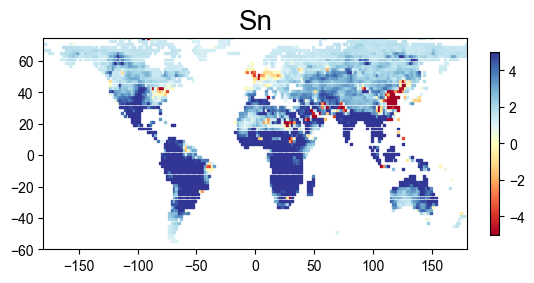

In [460]:
plt.figure(num=None, figsize=(20, 2.75), dpi=100, facecolor='w', edgecolor='k')
cm = plt.cm.get_cmap('RdYlBu')
x = coord['longitude']
y = coord['latitude']

plt.subplot(1,3,1)
plt.title('Sn', fontsize = 20, fontname = "Arial", color = "black")
z = coord['Sn_adj']
sc = plt.scatter(x, y, c=z, marker="s", vmin=-5, vmax=5, s=2, cmap=cm)
plt.xlim([-180, 180])
plt.ylim([-60, 75])
plt.colorbar(fraction=0.02)

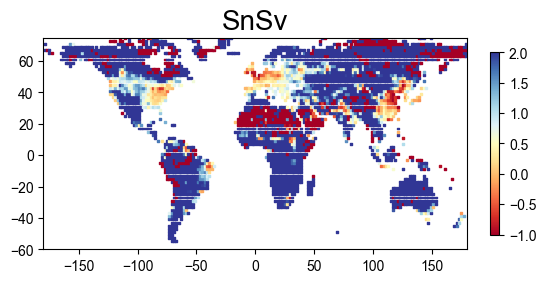

In [461]:
plt.figure(num=None, figsize=(20, 2.75), dpi=100, facecolor='w', edgecolor='k')
cm = plt.cm.get_cmap('RdYlBu')
x = coord['longitude']
y = coord['latitude']

plt.subplot(1,3,1)
plt.title('SnSv', fontsize = 20, fontname = "Arial", color = "black")
z = coord['SnSv_adj']
sc = plt.scatter(x, y, c=z, marker="s", vmin=-1, vmax=2, s=2, cmap=cm)
plt.xlim([-180, 180])
plt.ylim([-60, 75])
plt.colorbar(fraction=0.02)

(-60.0, 75.0)

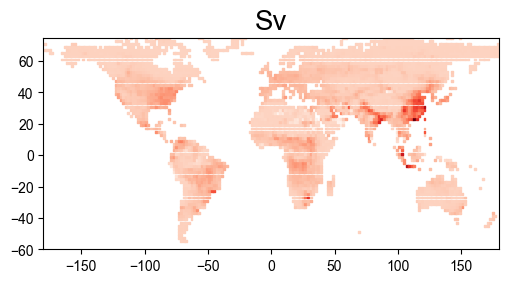

In [462]:
temp = coord

plt.figure(num=None, figsize=(20, 2.75), dpi=100, facecolor='w', edgecolor='k')
cm = plt.cm.get_cmap('Reds')
x = temp['longitude']
y = temp['latitude']

plt.subplot(1,3,1)
plt.title('Sv', fontsize = 20, fontname = "Arial", color = "black")
z = (temp['Sv_adj'])
sc = plt.scatter(x, y, c=z, marker="s",s=2, cmap=cm)
plt.xlim([-180, 180])
plt.ylim([-60, 75])
#plt.colorbar(fraction=0.02)

In [464]:
coord

,longitude,latitude,Sn,Sv,SnSv,FNR,HOP,LER_etoo,LER_isop,Sv_adj,Sn_adj,SnSv_adj
loc_x,,,,,,,,,,,,
1007.0,1.0,7.0,4.643417e+06,1.491373e+06,3.113518,0.847337,0.588327,0.001990,0.136939,1.491373,10.503281,7.042691
1009.0,1.0,9.0,4.758675e+06,1.633897e+06,2.912470,1.031314,0.455310,0.004121,0.576027,1.633897,10.733796,6.569445
1011.0,1.0,11.0,1.966960e+06,2.992600e+06,0.657275,0.971161,0.600245,0.002400,0.199374,2.992600,5.150366,1.721034
1013.0,1.0,13.0,4.613372e+05,3.831023e+06,0.120421,0.857094,0.708265,0.000656,0.020673,3.831023,2.139121,0.558368
1015.0,1.0,15.0,1.305974e+06,2.407488e+06,0.542463,0.890078,0.762063,0.000474,0.010954,2.407488,3.828394,1.590203
...,...,...,...,...,...,...,...,...,...,...,...,...
359045.0,-1.0,45.0,6.752232e+03,2.943472e+06,0.002294,0.344742,0.354096,0.000573,0.156564,2.943472,1.229951,0.417857
359047.0,-1.0,47.0,-8.245514e+05,3.630210e+06,-0.227136,0.170657,0.225052,0.000050,0.012392,3.630210,-0.432657,-0.119182
359049.0,-1.0,49.0,-1.167805e+06,3.579772e+06,-0.326223,0.118948,0.155709,0.000025,0.008964,3.579772,-1.119163,-0.312635


In [465]:
coord['FNR_NO2'] = FNR_NO2_map['FNR_NO2']
coord['FNR_NOy'] = fnr_noy_map['FNR_NOy']
coord['FNR_NOx'] = FNR_NOx_map['FNR_NOx']

In [466]:
coord.to_csv('regime diagnosis map.csv', index=False)

In [463]:
coef = dataset_land.groupby('loc_x').apply(lambda g: sm.OLS(g['o3net_mole'], g[['N','V']]).fit().params)
coef['SnSv'] = coef['N']/coef['V']
coord['Sn'] = coef['N'] 
coord['Sv'] = coef['V']
coord['SnSv'] = coef['SnSv']

In [156]:
coef = dataset_land.groupby('loc_x').apply(lambda g: sm.OLS(g['o3net_mole'], g[['NV','N','V']]).fit().params)

In [157]:
coef['Sn'] = coef['NV'] + coef['N']
coef['Sv'] = coef['NV'] + coef['V']
coef['SnSv'] = coef['Sn']/coef['Sv']

In [158]:
coord = dataset_land.groupby(['loc_x']).mean()[['longitude','latitude']]

In [159]:
coord['Sn'] = coef['Sn']
coord['Sv'] = coef['Sv']
coord['SnSv'] = coef['SnSv']

(-60.0, 75.0)

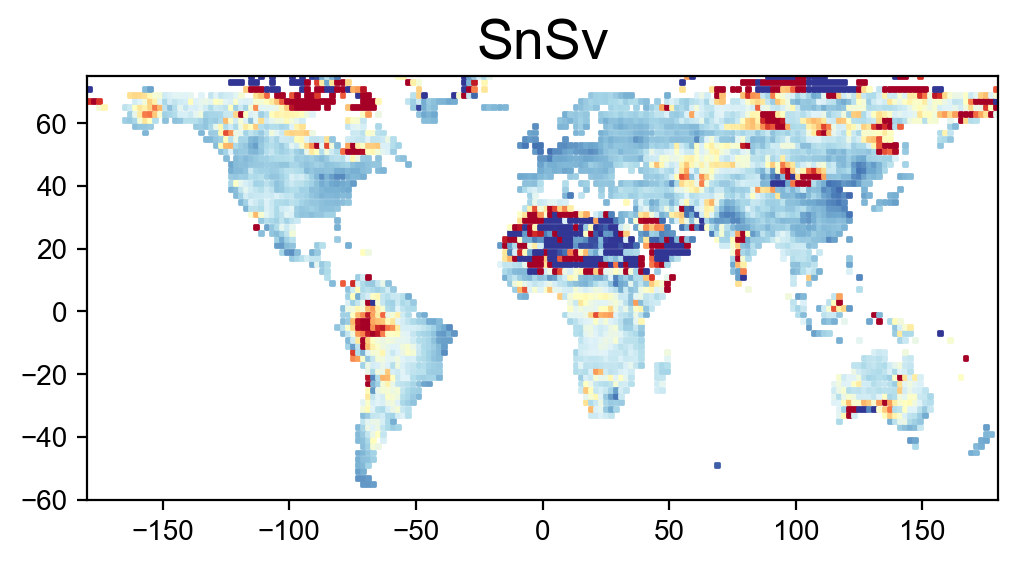

In [164]:
temp = coord

plt.figure(num=None, figsize=(20, 2.75), dpi=200, facecolor='w', edgecolor='k')
cm = plt.cm.get_cmap('RdYlBu_r')
x = temp['longitude']
y = temp['latitude']

plt.subplot(1,3,1)
plt.title('SnSv', fontsize = 20, fontname = "Arial", color = "black")
z = (temp['SnSv'])
sc = plt.scatter(x, y, c=z, marker="s", vmin=-1, vmax=3, s=2, cmap=cm)
plt.xlim([-180, 180])
plt.ylim([-60, 75])
#plt.colorbar(fraction=0.02)

In [73]:
sens_country

['longitude',
 'latitude',
 't',
 'loc_x',
 'o3',
 'o3prod',
 'o3loss',
 'eminox',
 'emivoc',
 'tas',
 'hus',
 'aod',
 'bldep',
 'ua',
 'va',
 'ps',
 'jno2',
 'photo1d',
 'lossch4',
 'lossco',
 'no2',
 'no',
 'oh',
 'h2o',
 'pan',
 'hno3',
 'co',
 'hcho',
 'ch4',
 'ch3o2_mod',
 'ho2_mod',
 'o1d_mod',
 'o3_mole',
 'no2_mole',
 'no_mole',
 'h2o_mole',
 'co_mole',
 'hcho_mole',
 'oh_mole',
 'n2_mole',
 'o2_mole',
 'lossco_mole',
 'lossch4_mole',
 'o1d_mole',
 'ho2_mole',
 'ch3o2_mole',
 'ch3ooh_mole',
 'o1d_mod_vmr',
 'ho2_mod_vmr',
 'ch3o2_mod_vmr',
 'o1d_vmr',
 'ho2_vmr',
 'ch3o2_vmr',
 'o1d_mod_mole',
 'ho2_mod_mole',
 'ch3o2_mod_mole',
 'o1d_mole_adj',
 'ho2_mole_adj',
 'ch3o2_mole_adj',
 'k1',
 'k2',
 'k3',
 'k4',
 'k5',
 'k6',
 'k7',
 'k8',
 'k9',
 'k9a',
 'k9b',
 'k10',
 'k11',
 'k12',
 'k13',
 'k14',
 'k15',
 'k15a',
 'k15b',
 'k16',
 'pt1',
 'pt2',
 'pt4',
 'pt5',
 'pt6',
 'o3prod_mole',
 'o3loss_mole',
 'pt3',
 'pt7',
 'pt3_adj',
 'pt7_adj',
 'o3prod_mole_adj',
 'o3loss_mole_adj

In [74]:
dataset_land['placename']

0         French Southern & Antarctic Lands
1                               New Zealand
2                               New Zealand
3                                 Australia
4                               New Zealand
                        ...                
232315                            Greenland
232316                            Greenland
232317                            Greenland
232318                            Greenland
232319                            Greenland
Name: placename, Length: 228600, dtype: object

#### FNR(NOy)

In [176]:
dataset_land['NOx'] = dataset_land['no2_mole']+dataset_land['no_mole']

dataset_land['hno3_mole'] = dataset_land['hno3']*1.01325*10**5/dataset['tas']*7.243*10**7*10**9
dataset_land['pan_mole'] = dataset_land['pan']*1.01325*10**5/dataset['tas']*7.243*10**7*10**9

dataset_land['NOz'] = dataset_land['hno3_mole']+dataset_land['pan_mole']
dataset_land['NOy'] = dataset_land['NOx']+dataset_land['NOz']

dataset_land['FNR_NOy'] = dataset_land['hcho_mole']/dataset_land['NOy']

In [181]:
fnr_noy_map = dataset_land.groupby(['loc_x']).mean()[['longitude','latitude','FNR_NOy']]

(-60.0, 75.0)

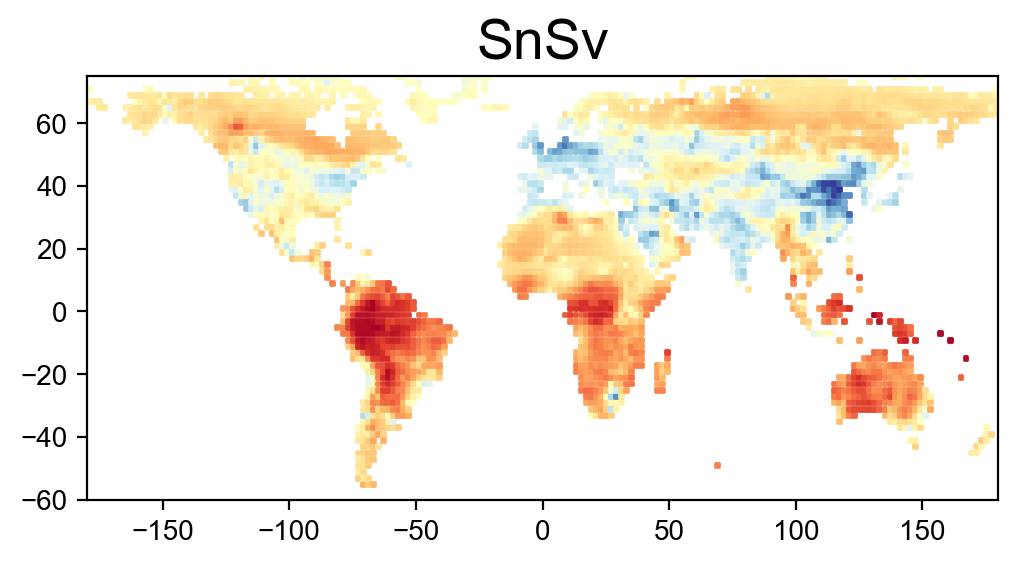

In [183]:
temp = fnr_noy_map ## 我们以FNR(NOy)作为标准结果来与其他方法进行比对

plt.figure(num=None, figsize=(20, 2.75), dpi=200, facecolor='w', edgecolor='k')
cm = plt.cm.get_cmap('RdYlBu_r')
x = temp['longitude']
y = temp['latitude']

plt.subplot(1,3,1)
plt.title('SnSv', fontsize = 20, fontname = "Arial", color = "black")
z = np.log(temp['FNR_NOy'])
sc = plt.scatter(x, y, c=z, marker="s", s=2, cmap=cm)
plt.xlim([-180, 180])
plt.ylim([-60, 75])
#plt.colorbar(fraction=0.02)

In [184]:
fnr_noy_map['FNR_NOy'].mean()

0.7328727483539509

In [185]:
fnr_noy_map['FNR_NOy'].max()

6.7192278966518835

In [189]:
np.nanpercentile(fnr_noy_map['FNR_NOy'],1)

0.037101324605241966

In [190]:
np.nanpercentile(fnr_noy_map['FNR_NOy'],99)

4.7347307743403615

In [246]:
a = 0.12
b = 0.20
c = 0.50

fnr_noy_map['regime1'] = (np.sign(fnr_noy_map['FNR_NOy']-a)+1)/2
fnr_noy_map['regime2'] = (np.sign(fnr_noy_map['FNR_NOy']-b)+1)/2
fnr_noy_map['regime3'] = (np.sign(fnr_noy_map['FNR_NOy']-c)+1)/2
fnr_noy_map['regime'] = fnr_noy_map['regime1']+fnr_noy_map['regime2']+fnr_noy_map['regime3']+1

(-60.0, 75.0)

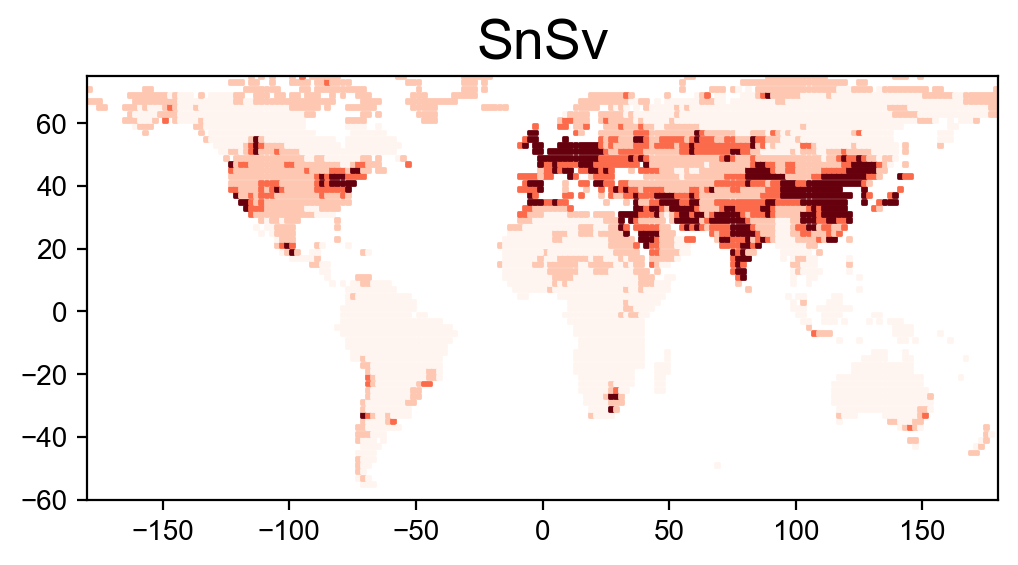

In [247]:
temp = fnr_noy_map ## 我们以FNR(NOy)作为标准结果来与其他方法进行比对

plt.figure(num=None, figsize=(20, 2.75), dpi=200, facecolor='w', edgecolor='k')
cm = plt.cm.get_cmap('Reds_r')
x = temp['longitude']
y = temp['latitude']

plt.subplot(1,3,1)
plt.title('SnSv', fontsize = 20, fontname = "Arial", color = "black")
z = np.log(temp['regime'])
sc = plt.scatter(x, y, c=z, marker="s", s=2, cmap=cm)
plt.xlim([-180, 180])
plt.ylim([-60, 75])
#plt.colorbar(fraction=0.02)

#### FNR(NOx)

In [98]:
dataset_land['NOx'] = dataset_land['no2_mole']+dataset_land['no_mole']
dataset_land['FNR_NOx'] = dataset_land['hcho_mole']/dataset_land['NOx']

In [99]:
FNR_NOx_map = dataset_land.groupby(['loc_x']).mean()[['longitude','latitude','FNR_NOx']]

(-60.0, 75.0)

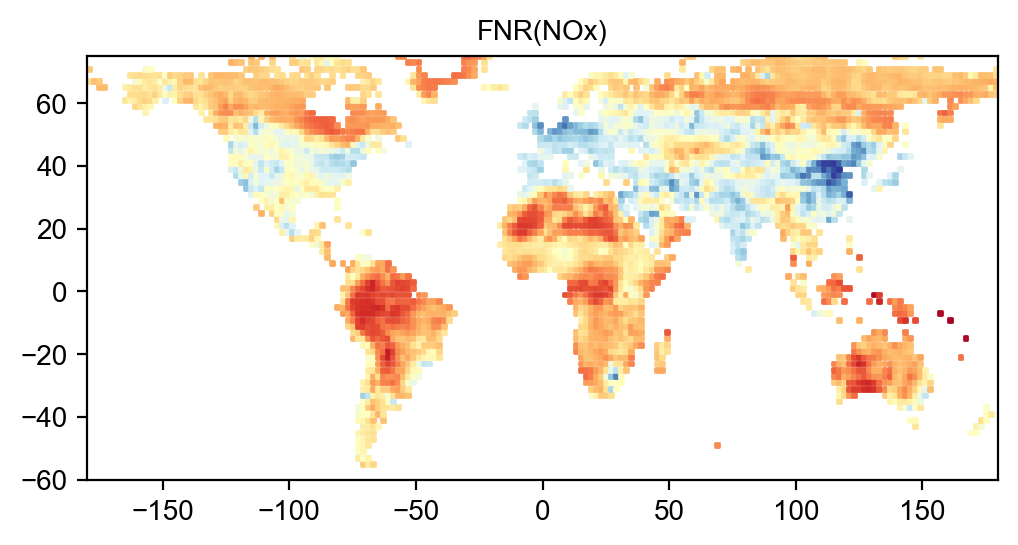

In [100]:
temp = FNR_NOx_map

plt.figure(num=None, figsize=(20, 2.75), dpi=200, facecolor='w', edgecolor='k')
cm = plt.cm.get_cmap('RdYlBu_r')
x = temp['longitude']
y = temp['latitude']

plt.subplot(1,3,1)
plt.title('FNR(NOx)', fontsize = 10, fontname = "Arial", color = "black")
z = np.log(temp['FNR_NOx'])
sc = plt.scatter(x, y, c=z, marker="s", s=2, cmap=cm)
plt.xlim([-180, 180])
plt.ylim([-60, 75])
#plt.colorbar(fraction=0.02)

#### FNR(NO2)

(-60.0, 75.0)

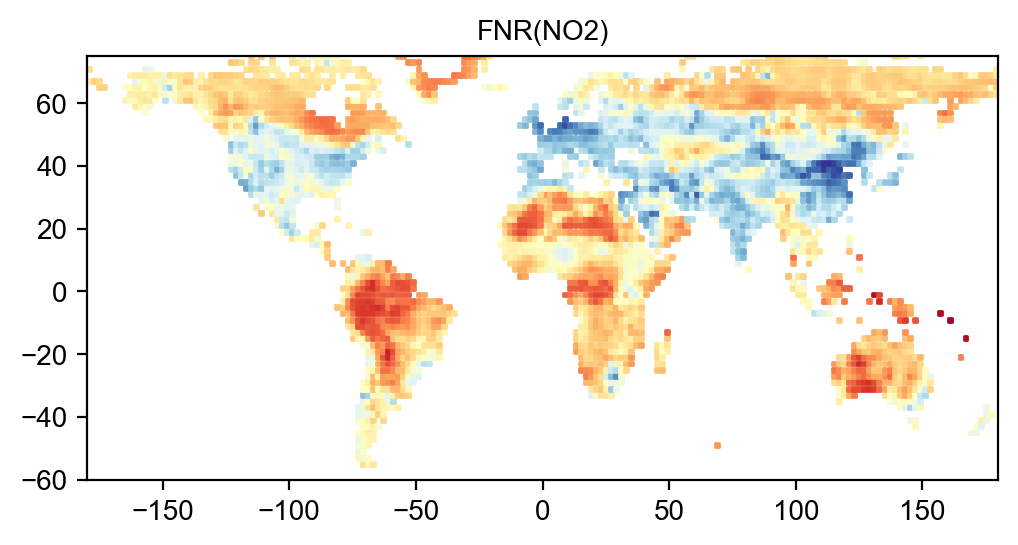

In [101]:
dataset_land['FNR_NO2'] = dataset_land['hcho_mole']/dataset_land['no2_mole']

FNR_NO2_map = dataset_land.groupby(['loc_x']).mean()[['longitude','latitude','FNR_NO2']]

temp = FNR_NO2_map

plt.figure(num=None, figsize=(20, 2.75), dpi=200, facecolor='w', edgecolor='k')
cm = plt.cm.get_cmap('RdYlBu_r')
x = temp['longitude']
y = temp['latitude']

plt.subplot(1,3,1)
plt.title('FNR(NO2)', fontsize = 10, fontname = "Arial", color = "black")
z = np.log(temp['FNR_NO2'])
sc = plt.scatter(x, y, c=z, marker="s", s=2, cmap=cm)
plt.xlim([-180, 180])
plt.ylim([-60, 75])
#plt.colorbar(fraction=0.02)

#### HOP

In [97]:
d_ho2_oh_beta = dataset_land.groupby('loc_x').apply(lambda g: sm.OLS(g['ho2_mole'], g[['oh_mole']]).fit().params)
d_ho2_oh_beta

,oh_mole
loc_x,
1007.0,21.602808
1009.0,17.197077
1011.0,24.672509
1013.0,31.034167
1015.0,34.035714
...,...
359045.0,11.444687
359047.0,7.242937
359049.0,5.050276


In [104]:
hop = dataset_land.groupby('loc_x').mean()[['longitude','latitude','o3']]
hop

,longitude,latitude,o3
loc_x,,,
1007.0,1.0,7.0,3.671902e-08
1009.0,1.0,9.0,3.777001e-08
1011.0,1.0,11.0,4.110404e-08
1013.0,1.0,13.0,4.381718e-08
1015.0,1.0,15.0,4.466261e-08
...,...,...,...
359045.0,-1.0,45.0,3.232083e-08
359047.0,-1.0,47.0,3.218338e-08
359049.0,-1.0,49.0,3.243398e-08


In [106]:
hop['d_ho2_oh'] = d_ho2_oh_beta['oh_mole']
hop['HOP'] = hop['d_ho2_oh']/(hop['o3']*10**9)
hop

,longitude,latitude,o3,d_ho2_oh,HOP
loc_x,,,,,
1007.0,1.0,7.0,3.671902e-08,21.602808,0.588327
1009.0,1.0,9.0,3.777001e-08,17.197077,0.455310
1011.0,1.0,11.0,4.110404e-08,24.672509,0.600245
1013.0,1.0,13.0,4.381718e-08,31.034167,0.708265
1015.0,1.0,15.0,4.466261e-08,34.035714,0.762063
...,...,...,...,...,...
359045.0,-1.0,45.0,3.232083e-08,11.444687,0.354096
359047.0,-1.0,47.0,3.218338e-08,7.242937,0.225052
359049.0,-1.0,49.0,3.243398e-08,5.050276,0.155709


(-60.0, 75.0)

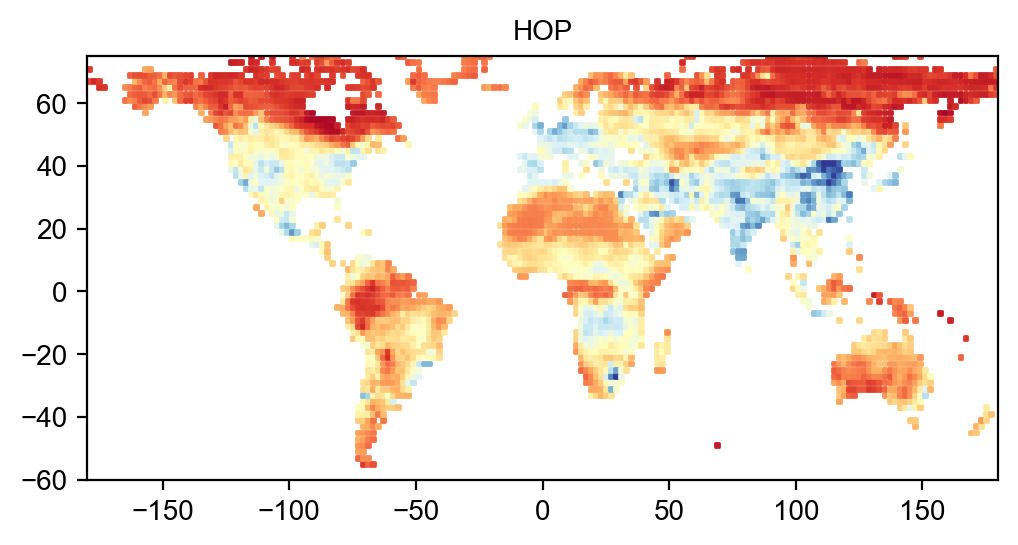

In [107]:
temp = hop

plt.figure(num=None, figsize=(20, 2.75), dpi=200, facecolor='w', edgecolor='k')
cm = plt.cm.get_cmap('RdYlBu_r')
x = temp['longitude']
y = temp['latitude']

plt.subplot(1,3,1)
plt.title('HOP', fontsize = 10, fontname = "Arial", color = "black")
z = np.log(temp['HOP'])
sc = plt.scatter(x, y, c=z, marker="s", s=2, cmap=cm)
plt.xlim([-180, 180])
plt.ylim([-60, 75])
#plt.colorbar(fraction=0.02)

In [112]:
#### LER(EtOOeq)

In [115]:
dataset_land['pt3'] = dataset_land['o3prod_mole_stacked'] - dataset_land['pt1'] - dataset_land['pt2']
dataset_land['pt7'] = dataset_land['o3loss_mole_stacked'] - dataset_land['pt4'] - dataset_land['pt5'] - dataset_land['pt6']

dataset_land['etoo_eq'] = dataset_land['pt3']/dataset_land['k18']/dataset_land['no_mole']
dataset_land['isop_eq'] = dataset_land['pt7']/dataset_land['k27']/dataset_land['o3_mole']

dataset_land['nox_mole'] = dataset_land['no_mole'] + dataset_land['no2_mole']

dataset_land['LER_etoo'] = dataset_land['etoo_eq']/dataset_land['nox_mole']
dataset_land['LER_isop'] = dataset_land['isop_eq']/dataset_land['nox_mole']

In [116]:
LER_etoo_map = dataset_land.groupby(['loc_x']).mean()[['longitude','latitude','LER_etoo']]
LER_isop_map = dataset_land.groupby(['loc_x']).mean()[['longitude','latitude','LER_isop']]

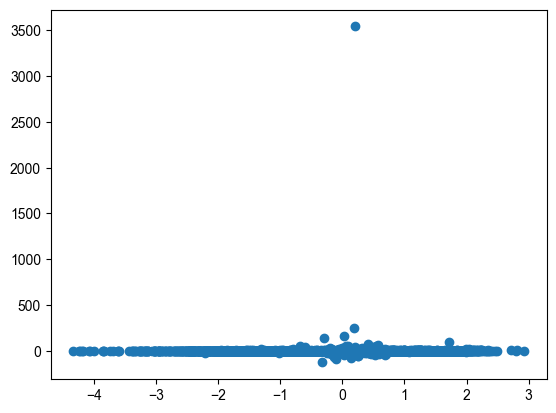

In [168]:
plt.scatter(np.log(coord['FNR']), coord['SnSv'])

(-60.0, 75.0)

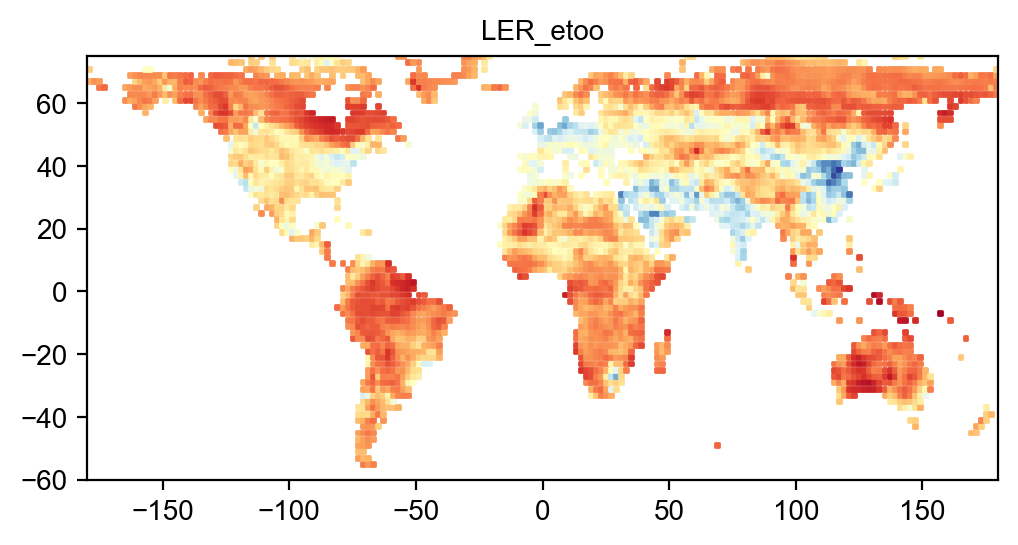

In [117]:
temp = LER_etoo_map 

plt.figure(num=None, figsize=(20, 2.75), dpi=200, facecolor='w', edgecolor='k')
cm = plt.cm.get_cmap('RdYlBu_r')
x = temp['longitude']
y = temp['latitude']

plt.subplot(1,3,1)
plt.title('LER_etoo', fontsize = 10, fontname = "Arial", color = "black")
z = np.log(temp['LER_etoo'])
sc = plt.scatter(x, y, c=z, marker="s", s=2, cmap=cm)
plt.xlim([-180, 180])
plt.ylim([-60, 75])
#plt.colorbar(fraction=0.02)

(-60.0, 75.0)

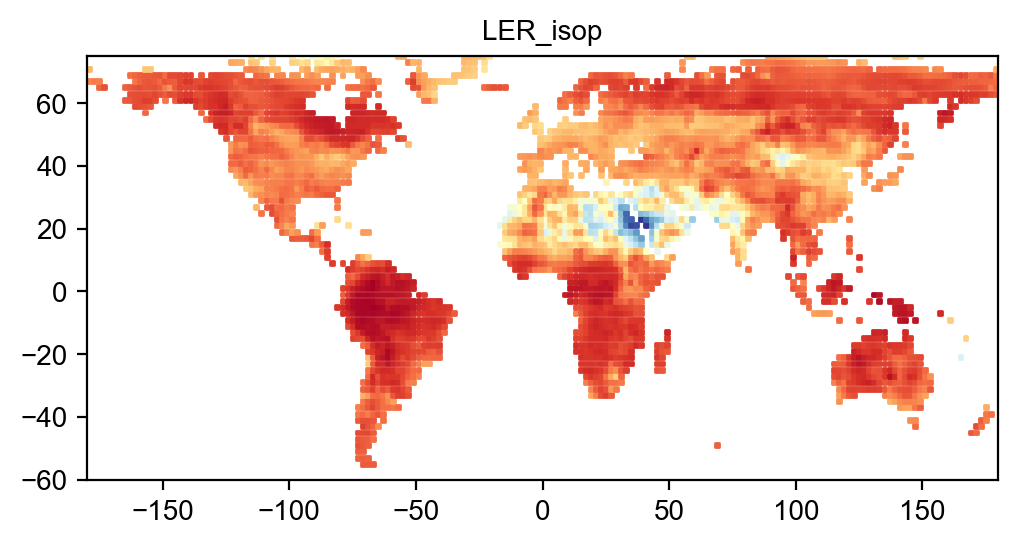

In [119]:
temp = LER_isop_map 

plt.figure(num=None, figsize=(20, 2.75), dpi=200, facecolor='w', edgecolor='k')
cm = plt.cm.get_cmap('RdYlBu_r')
x = temp['longitude']
y = temp['latitude']

plt.subplot(1,3,1)
plt.title('LER_isop', fontsize = 10, fontname = "Arial", color = "black")
z = np.log(temp['LER_isop'])
sc = plt.scatter(x, y, c=z, marker="s", s=2, cmap=cm)
plt.xlim([-180, 180])
plt.ylim([-60, 75])
#plt.colorbar(fraction=0.02)

In [120]:
coord

,longitude,latitude,Sn,Sv,SnSv
loc_x,,,,,
1007.0,1.0,7.0,3.694551e+06,3.991420e+06,0.925623
1009.0,1.0,9.0,3.142076e+06,5.228414e+06,0.600962
1011.0,1.0,11.0,2.761940e+05,4.951608e+06,0.055779
1013.0,1.0,13.0,1.220270e+06,2.494013e+06,0.489280
1015.0,1.0,15.0,1.813671e+06,1.325750e+06,1.368035
...,...,...,...,...,...
359045.0,-1.0,45.0,-1.033870e+06,5.089830e+06,-0.203125
359047.0,-1.0,47.0,-9.111044e+05,3.386652e+06,-0.269028
359049.0,-1.0,49.0,-1.181798e+06,3.253025e+06,-0.363292


In [167]:
coord['FNR'] = FNR_NOx_map['FNR_NOx']
coord['HOP'] = hop['HOP']
coord['LER_etoo'] = LER_etoo_map['LER_etoo']
coord['LER_isop'] = LER_isop_map['LER_isop']

In [248]:
coord

,longitude,latitude,Sn,Sv,SnSv,FNR,HOP,LER_etoo,LER_isop
loc_x,,,,,,,,,
1007.0,1.0,7.0,3.694551e+06,3.991420e+06,0.925623,0.847337,0.588327,0.001990,0.136939
1009.0,1.0,9.0,3.142076e+06,5.228414e+06,0.600962,1.031314,0.455310,0.004121,0.576027
1011.0,1.0,11.0,2.761940e+05,4.951608e+06,0.055779,0.971161,0.600245,0.002400,0.199374
1013.0,1.0,13.0,1.220270e+06,2.494013e+06,0.489280,0.857094,0.708265,0.000656,0.020673
1015.0,1.0,15.0,1.813671e+06,1.325750e+06,1.368035,0.890078,0.762063,0.000474,0.010954
...,...,...,...,...,...,...,...,...,...
359045.0,-1.0,45.0,-1.033870e+06,5.089830e+06,-0.203125,0.344742,0.354096,0.000573,0.156564
359047.0,-1.0,47.0,-9.111044e+05,3.386652e+06,-0.269028,0.170657,0.225052,0.000050,0.012392
359049.0,-1.0,49.0,-1.181798e+06,3.253025e+06,-0.363292,0.118948,0.155709,0.000025,0.008964


In [470]:
coord['Sv_adj'].min()

-7.136975075662172